CSCI-P556: Applied Machine Learning
Fall 2018
Assignment #2
---



# Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

 Ans:  It is observed that first pair of train/validation set is smaller in size compared to the second pair of the train/validation method.
It is also observed that the first pair of training set has more data points with the y label 'yes'. the data is more skewed towards the customers who have subscribed for the term deposits


In [66]:
import pandas as pd 
import numpy as np

In [67]:
train_1 = pd.read_csv('train_1.csv')
val_1 = pd.read_csv('valid_1.csv')
train_2 = pd.read_csv('train_2.csv')
val_2 = pd.read_csv('valid_2.csv')
test = pd.read_csv('test.csv')

In [68]:
print(train_1.shape)
print(train_2.shape)
print(val_1.shape)
print(val_2.shape)
print(test.shape)

(6769, 17)
(28934, 17)
(1693, 17)
(7234, 17)
(9043, 17)


### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.   Features that have continous numeric values are age, balance, day, duration ,previous

2.   job ,marital ,education ,default ,housing ,loan ,contact ,month ,poutcome are the categorcial features present in the data. I have used one hot encoding and converted the categorical features into numerical values with the initial feature label's as the new features after one hot encoding 

3.   Pdays is the only feature which has missing values. Missing values in this features are represented by -1 . Since most data points in the data set has missing values for pdays , I have removed the feature of pdays fron the data to improve the performance of the model. 



In [69]:
print('job:\n',train_1['job'].unique())
print('marital:\n',train_1['marital'].unique())
print('education:\n',train_1['education'].unique())
print('default:\n',train_1['default'].unique())
print('housing:\n',train_1['housing'].unique())
print('loan:\n',train_1['loan'].unique())
print('contact:\n',train_1['contact'].unique())
print('month:\n',train_1['month'].unique())
#print('pdays:\n',train_1['pdays'].unique())
print('poutcome:\n',train_1['poutcome'].unique())

job:
 ['housemaid' 'blue-collar' 'management' 'technician' 'services'
 'self-employed' 'retired' 'unemployed' 'entrepreneur' 'admin.' 'student'
 'unknown']
marital:
 ['divorced' 'married' 'single']
education:
 ['secondary' 'tertiary' 'primary' 'unknown']
default:
 ['no' 'yes']
housing:
 ['no' 'yes']
loan:
 ['no' 'yes']
contact:
 ['cellular' 'unknown' 'telephone']
month:
 ['jul' 'may' 'aug' 'feb' 'oct' 'mar' 'jun' 'nov' 'apr' 'jan' 'sep' 'dec']
poutcome:
 ['unknown' 'failure' 'success' 'other']


In [70]:
print('job:\n',train_2['job'].unique())
print('marital:\n',train_2['marital'].unique())
print('education:\n',train_2['education'].unique())
print('default:\n',train_2['default'].unique())
print('housing:\n',train_2['housing'].unique())
print('loan:\n',train_2['loan'].unique())
print('contact:\n',train_2['contact'].unique())
print('month:\n',train_2['month'].unique())
#print('pdays:\n',train_1['pdays'].unique())
print('poutcome:\n',train_2['poutcome'].unique())

job:
 ['technician' 'admin.' 'blue-collar' 'unemployed' 'services' 'management'
 'housemaid' 'self-employed' 'retired' 'entrepreneur' 'student' 'unknown']
marital:
 ['married' 'divorced' 'single']
education:
 ['tertiary' 'secondary' 'primary' 'unknown']
default:
 ['no' 'yes']
housing:
 ['no' 'yes']
loan:
 ['no' 'yes']
contact:
 ['cellular' 'telephone' 'unknown']
month:
 ['feb' 'may' 'aug' 'apr' 'oct' 'jun' 'jul' 'nov' 'jan' 'mar' 'sep' 'dec']
poutcome:
 ['unknown' 'failure' 'other' 'success']


In [71]:
sample = ['job','marital','education','contact','month','poutcome']
train_1= pd.get_dummies(train_1,columns=sample)
train_1['y']=train_1['y'].map({'yes':1,'no':0})
train_1['default']=train_1['default'].map({'yes':1,'no':0})
train_1['housing']=train_1['housing'].map({'yes':1,'no':0})
train_1['loan']=train_1['loan'].map({'yes':1,'no':0})

In [72]:
sample = ['job','marital','education','contact','month','poutcome']
train_2= pd.get_dummies(train_2,columns=sample)
train_2['y']=train_2['y'].map({'yes':1,'no':0})
train_2['default']=train_2['default'].map({'yes':1,'no':0})
train_2['housing']=train_2['housing'].map({'yes':1,'no':0})
train_2['loan']=train_2['loan'].map({'yes':1,'no':0})

In [73]:
sample= ['job','marital','education','contact','month','poutcome']
val_1= pd.get_dummies(val_1,columns=sample)
val_1['y']=val_1['y'].map({'yes':1,'no':0})
val_1['default']=val_1['default'].map({'yes':1,'no':0})
val_1['housing']=val_1['housing'].map({'yes':1,'no':0})
val_1['loan']=val_1['loan'].map({'yes':1,'no':0})

In [74]:
sample = ['job','marital','education','contact','month','poutcome']
val_2= pd.get_dummies(val_2,columns=sample)
val_2['y']=val_2['y'].map({'yes':1,'no':0})
val_2['default']=val_2['default'].map({'yes':1,'no':0})
val_2['housing']=val_2['housing'].map({'yes':1,'no':0})
val_2['loan']=val_2['loan'].map({'yes':1,'no':0})

In [75]:
sample = ['job','marital','education','contact','month','poutcome']
test= pd.get_dummies(test,columns=sample)
test['y']=test['y'].map({'yes':1,'no':0})
test['default']=test['default'].map({'yes':1,'no':0})
test['housing']=test['housing'].map({'yes':1,'no':0})
test['loan']=test['loan'].map({'yes':1,'no':0})

In [76]:
train_1=train_1.drop(['pdays'], axis=1)
train_2=train_2.drop(['pdays'],axis=1)
val_1=val_1.drop(['pdays'],axis=1)
val_2=val_2.drop(['pdays'],axis=1)
test=test.drop(['pdays'],axis=1)

In [77]:
#function for normalization

def Normal(X):
    #print(np.mean(X), np.amax(X),np.amin(X))
    X=(X-np.mean(X))/(np.amax(X)-np.amin(X))
    return X

In [78]:
y_train_1=train_1['y']
train_1 = train_1.drop(['y'],axis=1)
y_val_1=val_1['y']
val_1 = val_1.drop(['y'],axis=1)
y_test=test['y']
test = test.drop(['y'],axis=1)
y_train_2=train_2['y']
train_2 = train_2.drop(['y'],axis=1)
y_val_2=val_2['y']
val_2 = val_2.drop(['y'],axis=1)

In [79]:
#Normalization

sample =['age','balance','day','duration','campaign','previous']
for i in range(len(sample)):
    train_1[sample[i]] = Normal(train_1[sample[i]])
for i in range(len(sample)):
    train_2[sample[i]] = Normal(train_2[sample[i]])
for i in range(len(sample)):
    val_1[sample[i]] = Normal(val_1[sample[i]])
for i in range(len(sample)):
    val_2[sample[i]] = Normal(val_2[sample[i]])
for i in range(len(sample)):
    test[sample[i]] = Normal(test[sample[i]])

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

Training accuracy: 0.8324715615305067
validation accuracy: 0.8204370939161252
test accuracy 0.757160234435475

Training accuracy: 0.8323238292214508
validation accuracy: 0.819846426461902
test accuracy 0.7572708172066792

Training accuracy: 0.8326192938395627
validation accuracy: 0.819846426461902
test accuracy 0.7574919827490877

Training accuracy: 0.8320283646033387
validation accuracy: 0.819846426461902
test accuracy 0.7582660621475175

Training accuracy: 0.8315851676761707
validation accuracy: 0.8186650915534555
test accuracy 0.7591507243171514

Training accuracy: 0.8311419707490028
validation accuracy: 0.819846426461902
test accuracy 0.7604777175716023

Training accuracy: 0.8312897030580588
validation accuracy: 0.819846426461902
test accuracy 0.762578790224483

Training accuracy: 0.8309942384399468
validation accuracy: 0.815711754282339
test accuracy 0.7673338493862656

Training accuracy: 0.8075048013000443
validation accuracy: 0.7974010632014176
test accuracy 0.781377861329205

T

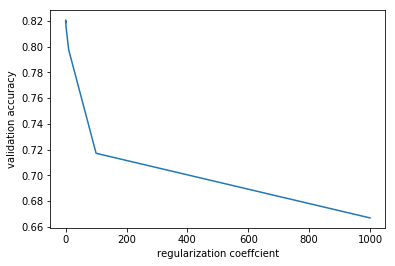

In [81]:
C = [500,100,50,20,10,5,2,1,.1,0.01,0.001]
L=[]
A=[]
val=0
for c in C:
    L.append(1/c)
    clf = LogisticRegression(penalty='l2', C=c, solver='newton-cg')
    clf.fit(train_1,y_train_1)
    print('Training accuracy:',clf.score(train_1, y_train_1) )
    preds = clf.predict(val_1)
    acc=accuracy_score(preds,y_val_1)
    if acc>val:
        best_c=c
        Valid_A=acc
    val=acc
    if(c==best_c):
        Train_A=clf.score(train_1, y_train_1)
    print('validation accuracy:', accuracy_score(preds,y_val_1))
    A.append(accuracy_score(preds,y_val_1))
    pred_test = clf.predict(test)
    print("test accuracy",accuracy_score(pred_test,y_test))
    if c==best_c:
        test_accuracy_A=accuracy_score(pred_test,y_test)
    print('')
print("best regularization coffecient",1/best_c)   
plt.plot(L,A)
plt.xlabel('regularization coeffcient')
plt.ylabel('validation accuracy')
plt.show()

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Training accuracy: 0.9025713693232875
Validation Accuracy: 0.9025435443737905
test accuracy 0.9013601680858122

Training accuracy: 0.9025713693232875
Validation Accuracy: 0.9025435443737905
test accuracy 0.9013601680858122

Training accuracy: 0.9027096149858298
Validation Accuracy: 0.9025435443737905
test accuracy 0.9014707508570164

Training accuracy: 0.9026750535701943
Validation Accuracy: 0.9025435443737905
test accuracy 0.9013601680858122

Training accuracy: 0.902605930738923
Validation Accuracy: 0.9026817804810616
test accuracy 0.9010284197721995

Training accuracy: 0.902605930738923
Validation Accuracy: 0.9024053082665192
test accuracy 0.9009178370009953

Training accuracy: 0.9023985622451096
Validation Accuracy: 0.9026817804810616
test accuracy 0.900807254229791

Training accuracy: 0.9022257551669316
Validation Accuracy: 0.9029582526956041
test accuracy 0.901249585314608

Training accuracy: 0.9019147024262114
Validation Accuracy: 0.9029582526956041
test accuracy 0.90180249917062

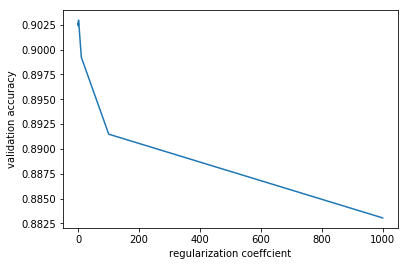

In [82]:
C = [5000,1000,100,50,20,10,5,2,1,.1,0.01,0.001]
L=[]
A=[]
val=0
for c in C:
    L.append(1/c)
    clf = LogisticRegression(penalty='l2', C=c, solver='newton-cg')
    clf.fit(train_2,y_train_2)
    preds = clf.predict(val_2)
    acc=accuracy_score(preds,y_val_2)
    if acc>val:
        best_c=c
        Valid_B=acc
    val=acc
    print('Training accuracy:',clf.score(train_2, y_train_2))
    if(c==best_c):
        Train_B=clf.score(train_2, y_train_2)
    print('Validation Accuracy:', accuracy_score(preds,y_val_2))
    A.append(accuracy_score(preds,y_val_2))
    pred_test = clf.predict(test)
    print("test accuracy",accuracy_score(pred_test,y_test))
    if c ==best_c:
        pred_test = clf.predict(test)
        test_accuracy_B=accuracy_score(pred_test,y_test)
    print('')
print(best_c)
print("best regularization coeffcient",1/best_c)
plt.xlabel('regularization coeffcient')
plt.ylabel('validation accuracy')
plt.plot(L,A)
plt.show()

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

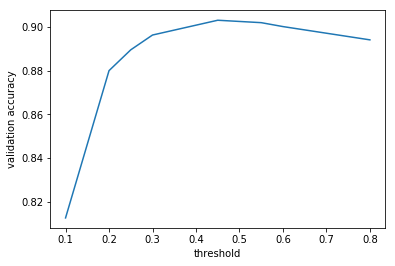

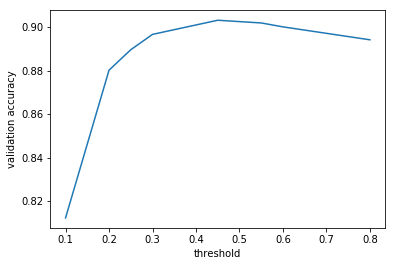

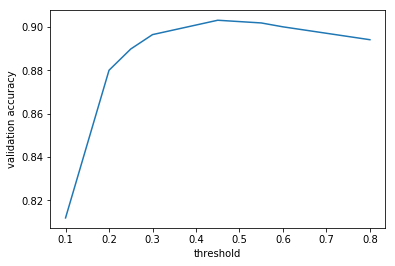

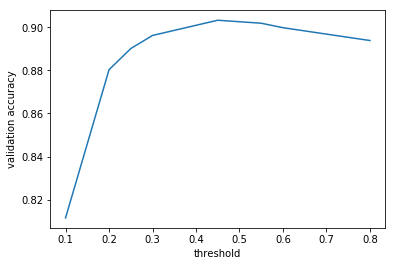

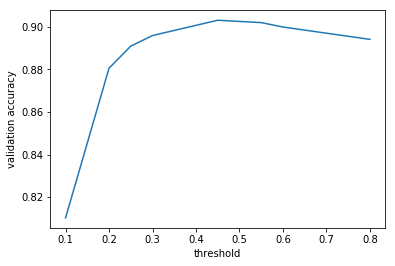

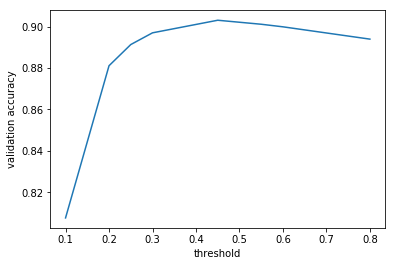

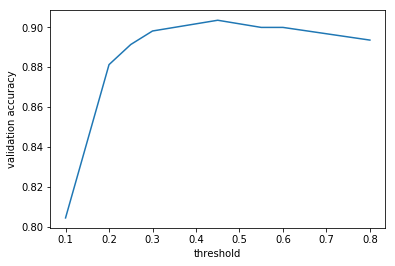

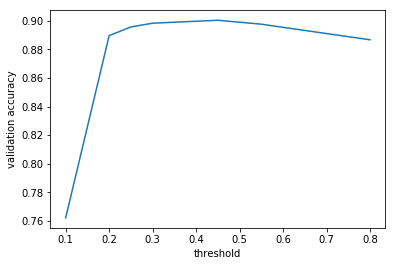

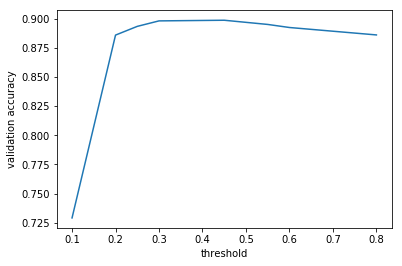

0.45
0.05


In [87]:
C = [100,50,20,10,5,2,1,.1,0.05,]
L=[]
A=[]
T=[]
V=[]
value=0
threshold_list = [0.1,0.20,0.25,0.30,0.45,0.55,0.6,0.8]
for c in C:
    #L.append(1/c)
    clf = LogisticRegression(penalty='l2', C=c, solver='newton-cg')
    clf.fit(train_2,y_train_2)
    
    for i in threshold_list:
        T.append(i)
        predics = np.where(clf.predict_proba(val_2)[:,1] > i, 1, 0)
        acc=accuracy_score(predics,y_val_2)
        V.append(acc)
        if acc>value:
            best_t=i
            best_c=c
            Valid_C=acc
        value=acc
        if(i==best_t and c==best_c):
            Train_C=clf.score(train_2, y_train_2)
            pred_test = clf.predict(test)
            test_accuracy_C=accuracy_score(pred_test,y_test)
    plt.plot(T,V)
    plt.xlabel('threshold')
    plt.ylabel('validation accuracy')
    plt.show()
    V=[]
    T=[]

                   
print(best_t)
print(best_c)

In [90]:
print("best threshold value possible is",best_t)
print("best lambda value possible is",1/best_c)

best threshold value possible is 0.45
best lambda value possible is 20.0


### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.



In [91]:
df=pd.DataFrame( {'training accuracy': [Train_A,Train_B,Train_C], 'validation accuracy': [Valid_A,Valid_B,Valid_C],'test accuracy':[test_accuracy_A,test_accuracy_B,test_accuracy_C]},index=['A','B','C'])
df

,test accuracy,training accuracy,validation accuracy
A,0.760478,0.831142,0.819846
B,0.901250,0.902226,0.902958
C,0.895499,0.894760,0.898535


The training ,validation and test accuracy's caluclated for Model A,Model B ,Model C are has above

Model A uses train_1 data set which has more data points of y labelled with 'No'.Data with more customer's who have subscribed  so Model A predictions are inclined towards the 'No' compared to the other Models (Model B and Model C).It might be the reason for Model A having less validation and test accuracy compared to Model B and Model C. test accuracy is a lot less than training accuracy due the use of different set of the data than the data the model is trained with.
Model B used train_2 data set which as aproximately equal distributions of y label's of Yes and No.
Model C has good accuracy compared to Model A due to the variation of the threshold which gives better scope of prediction.

According to my intution accuracy might not be the best metric to find the best hyperparameter's because in logistic regression there will be only two values of predicted outpot(0 and 1),So the accuracy possible for single data point can either be a zero (0%) or 100%.so there might be any other metrics which help's to find the best hyperparameter's

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

In [1063]:
from scipy.special import legendre
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
import random

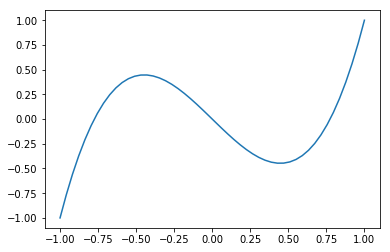

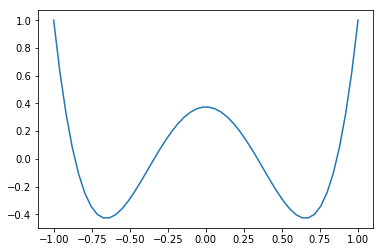

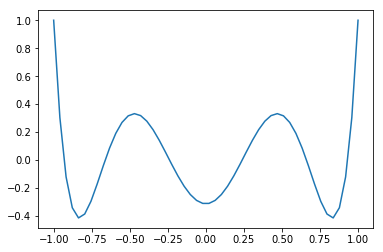

In [964]:
import numpy as np
from scipy.special import legendre

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    y=0
    x= np.linspace(low, high, 50, endpoint=True)
    for i in range(degree+1):
        y=y+(x**i)*w[i]
    plt.plot(x,y)
    plt.show()
    pass

## TEST CASES (The following lines should plot a function)
visualize_function(3, -1, 1)
visualize_function(4, -1, 1)
visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [965]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    w = get_coefficients(degree)
    #X_train = np.linspace(-1,1,n_train)
    X_train = np.array(list(stats.uniform(-1,1).rvs(n_train)))
    #X_train=[]
    #for i in range(n_train):
   #     X_train.append(random.uniform(-1,1))
    y_train=[]
    for i in range(n_train):
        y_p=0
        for j in range(degree+1):
            y_p=y_p + (X_train[i]**j) * w[j]+np.random.normal(0,sigma)
        y_train.append(y_p)
    w = get_coefficients(degree)
    #X_test=np.linspace(-1,1,n_test)
    X_test = np.array(list(stats.uniform(-1,1).rvs(n_test)))
    #X_test=[]
    #for i in range(n_test):
    #   X_test.append(random.uniform(-1,1))
    y_test=[]
    for i in range(n_test):
        y_p=0
        for j in range(degree+1):
            y_p=y_p + (X_test[i]**j) * w[j]+np.random.normal(0,sigma)
        y_test.append(y_p)
    return X_train, y_train, X_test, y_test

In [966]:
X_train = np.linspace(-1,1,10)
print(X_train, type(X_train), X_train.shape)
from scipy import stats
np.array(list(stats.uniform(-1,1).rvs(10))).shape

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ] <class 'numpy.ndarray'> (10,)


(10,)

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

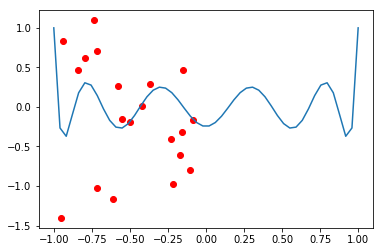

In [967]:
#1
G=generate_dataset(10,20,20,0.2)
X_train=G[0]
y_train=G[1]
X_test=G[2]
y_test=G[3]
plt.plot(X_train,y_train,'ro')
visualize_function(10, -1, 1)

Task 3 , question 3

In [538]:
# Model A for Quadratic Equation

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly_reg = PolynomialFeatures(degree=2)
#print(X_train)
X_test_2=X_test.reshape(-1, 1)
X_poly_2 = poly_reg.fit_transform(X_train.reshape(-1, 1))
pol_mod =linear_model.LinearRegression()
pol_mod.fit(X_poly_2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [539]:
# predicting on training data-set

y_train_predicted = pol_mod.predict(X_poly_2)
#print(y_train_predicted)

# predicting on test data-set
y_test_predict = pol_mod.predict(poly_reg.fit_transform(X_test_2))

# evaluating the model on training dataset
rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_train_predicted))

print("rmse_train_2",rmse_train_2)
rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("rmse_test_2",rmse_test_2)

rmse_train_2 0.5781037118188724
rmse_test_2 0.6972422142389275


In [540]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly_reg = PolynomialFeatures(degree=10)
#print(X_train)
X_test_10=X_test.reshape(-1, 1)
X_poly_10 = poly_reg.fit_transform(X_train.reshape(-1, 1))
pol_mod =linear_model.LinearRegression()
pol_mod.fit(X_poly_10, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [541]:
# predicting on training data-set
y_train_predicted = pol_mod.predict(X_poly_10)
#print(y_train_predicted)

# predicting on test data-set
y_test_predict = pol_mod.predict(poly_reg.fit_transform(X_test_10))

# evaluating the model on training dataset
rmse_train_10 = np.sqrt(mean_squared_error(y_train, y_train_predicted))

print("rmse_train_10",rmse_train_10)
rmse_test_10 = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("rmse_test_10",rmse_test_10)

rmse_train_10 0.36807912154471295
rmse_test_10 3.498481266209721


In [542]:
df=pd.DataFrame( {'train': [rmse_train_2, rmse_train_10], 'test': [rmse_test_2, rmse_test_10]},index=['2','10'])
df

,test,train
2,0.697242,0.578104
10,3.498481,0.368079


The results are as expected because the higher order polynomial equations tend to over fit the data compared to the lower order equations. The higher order equations tend to fit the noise which is not really the part of the data so when we fit new set of data (test data) we get more mean square error has the model is fit with considerable amount of noise also 

### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

In [453]:
G=generate_dataset(45,20,20,0)

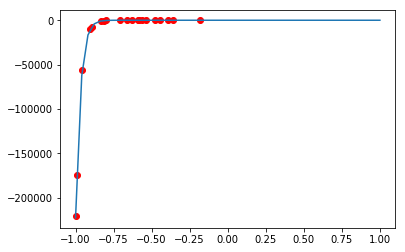

In [454]:
X_train=G[0]
y_train=G[1]
X_test=G[2]
y_test=G[3]
plt.plot(X_train,y_train,'ro')
visualize_function(45,-1, 1)

In [435]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly_reg = PolynomialFeatures(degree=45)
#print(X_train)
X_test_45=X_test.reshape(-1, 1)
X_poly_45 = poly_reg.fit_transform(X_train.reshape(-1, 1))
pol_mod =linear_model.LinearRegression()
pol_mod.fit(X_poly_45, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [436]:
# predicting on training data-set
y_train_predicted = pol_mod.predict(X_poly_45)
#print(y_train_predicted)

# predicting on test data-set
y_test_predict = pol_mod.predict(poly_reg.fit_transform(X_test_45))

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))

print("rmse_train_45",rmse_train)
rmse_test_45 = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("rmse_test_45",rmse_test_2)

rmse_train_45 8.950687623048063e-07
rmse_test_45 0.7534837262454407


This target does not have the noise unlike the previous targets obtained from the data with noise. The root mean square error is neglible and close to zero. The result is not suprsing because the data is generated from the polynomal equation of same order itself so the polynomial equation is able to properly fit the data.
There ia a considerable but very less mean square with the test data is different from the train data. but the mean square error is less because there is no noise present and the polynomial equation is of the same order from which data is generated.